In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows",None)

In [2]:
## Import our dataset 

housing = pd.read_csv('housing.csv')

In [3]:
housing.shape

(20640, 10)

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
## Checking for Missing Values 

housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot: xlabel='total_bedrooms', ylabel='Count'>

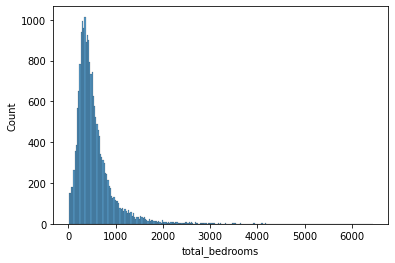

In [7]:
## Histogram 

sns.histplot(housing['total_bedrooms'])

In [8]:
median_value = housing['total_bedrooms'].median()
housing['total_bedrooms']=housing['total_bedrooms'].fillna(median_value)

In [9]:
housing['total_bedrooms']

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [10]:
## Observation 

# Since the mean and the median of the dataset are different from 
# each other we can say that median is a better metric to impute as the dataset 
# has outliers 

In [11]:
X = housing.drop('median_house_value', axis =1 )
y = housing['median_house_value']

In [12]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND


In [13]:
housing.groupby('ocean_proximity').count()['median_house_value']

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
Name: median_house_value, dtype: int64

<AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>

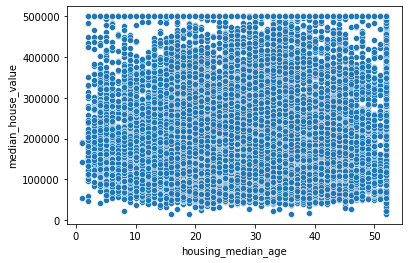

In [14]:
sns.scatterplot(x='housing_median_age' , y ='median_house_value' , data=housing)

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

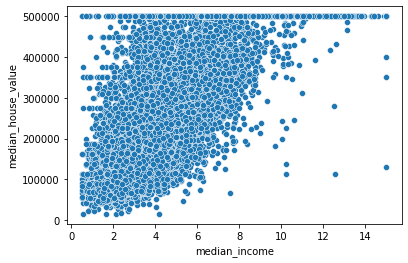

In [15]:
sns.scatterplot(x='median_income' , y ='median_house_value' , data=housing)

In [16]:
## Observation - There seems to be a linear trend while observing 
# the data of median income and median house value 

In [17]:
# Dummy Variable Treatment 

X = pd.get_dummies(X,drop_first=True)

In [18]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,1,0


In [19]:
## Divide the dataset into train and test 

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2 , random_state=0)

In [20]:
## Try to do the scaling 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
## Make out prediction model 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [35]:
lr.intercept_

207249.8958938948

In [36]:
lr.coef_

array([-53827.69618556, -54475.85958025,  13518.40248713,  -9289.24072989,
        28029.95291507, -44246.74912059,  30172.66497911,  73870.62752201,
       -17978.21519198,   2179.51861784,  -1353.69426958,   1875.62689179])

In [38]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [23]:
y_pred_lr  = lr.predict(X_test) 

In [24]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error, mean_squared_error

mae = np.round(mean_absolute_error(y_test,y_pred_lr),2)
mape = np.round(mean_absolute_percentage_error(y_test,y_pred_lr),4)
rmse = np.round(np.sqrt(mean_squared_error(y_test,y_pred_lr)),2)


In [25]:
print("MAE :", mae)
print("MAPE :", mape)
print("RMSE :", rmse)

MAE : 49707.43
MAPE : 0.2901
RMSE : 68696.38


In [26]:
# Example where we will use Decision Tree as a Regressor 

In [27]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=10)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [28]:
y_pred_dt = dtr.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error, mean_squared_error

mae = np.round(mean_absolute_error(y_test,y_pred_dt),2)
mape = np.round(mean_absolute_percentage_error(y_test,y_pred_dt),4)
rmse = np.round(np.sqrt(mean_squared_error(y_test,y_pred_dt)),2)


In [30]:
print("MAE :", mae)
print("MAPE :", mape)
print("RMSE :", rmse)

MAE : 40842.59
MAPE : 0.229
RMSE : 61379.97


In [31]:
## Implement Random Forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [32]:
y_pred_rf = rf.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error, mean_squared_error

mae = np.round(mean_absolute_error(y_test,y_pred_rf),2)
mape = np.round(mean_absolute_percentage_error(y_test,y_pred_rf),4)
rmse = np.round(np.sqrt(mean_squared_error(y_test,y_pred_rf)),2)


In [34]:
print("MAE :", mae)
print("MAPE :", mape)
print("RMSE :", rmse)

MAE : 31488.52
MAPE : 0.1788
RMSE : 47964.11


In [46]:
df = pd.DataFrame()

In [47]:
df['actuals'] = y_test.reset_index(drop=True)

In [50]:
df['lr_predictions'] = y_pred_lr

In [51]:
df['dt_predictions'] = y_pred_dt

In [52]:
df['rf_predictions'] = y_pred_rf

In [61]:
df = df.reset_index()

In [62]:
df.head()

,index,actuals,lr_predictions,dt_predictions,rf_predictions
0,0,136900,216660.244316,155303.225806,146293.00
1,1,241300,287580.098947,261940.891176,245275.00
2,2,200700,179529.140508,163642.285714,142410.00
3,3,72500,86557.166369,93150.000000,81151.00
4,4,460000,291796.505536,478757.568182,378204.21


In [69]:
df['error_lr'] = np.abs(df['actuals'] - df['lr_predictions'])

In [67]:
df['error_dt'] = np.abs(df['actuals'] - df['dt_predictions'])
df['error_rf'] = np.abs(df['actuals'] - df['rf_predictions'])

In [71]:
df.head()

,index,actuals,lr_predictions,dt_predictions,rf_predictions,error_dt,error_rf,error_lr
0,0,136900,216660.244316,155303.225806,146293.00,18403.225806,9393.00,79760.244316
1,1,241300,287580.098947,261940.891176,245275.00,20640.891176,3975.00,46280.098947
2,2,200700,179529.140508,163642.285714,142410.00,37057.714286,58290.00,21170.859492
3,3,72500,86557.166369,93150.000000,81151.00,20650.000000,8651.00,14057.166369
4,4,460000,291796.505536,478757.568182,378204.21,18757.568182,81795.79,168203.494464


In [72]:
df['error_rf'].mean()

31488.520562015503

In [73]:
df['error_dt'].mean()

40842.588825574145

In [74]:
df['error_lr'].mean()

49707.42799359943

<AxesSubplot: xlabel='error_rf', ylabel='error_dt'>

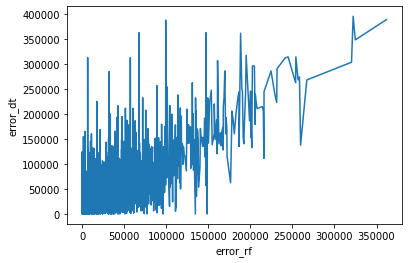

In [75]:
sns.lineplot(x='error_rf',y='error_dt',data=df)

In [76]:
corr_rf_dt = df['error_rf'].corr(df['error_dt'])

In [77]:
corr_rf_dt

0.761388709877843

<AxesSubplot: xlabel='error_lr', ylabel='error_dt'>

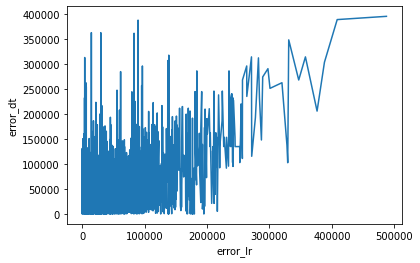

In [78]:
sns.lineplot(x='error_lr',y='error_dt',data=df)

In [79]:
corr_lr_dt = df['error_lr'].corr(df['error_dt'])

In [80]:
corr_lr_dt

0.5422691583830407

<AxesSubplot: xlabel='error_lr', ylabel='error_rf'>

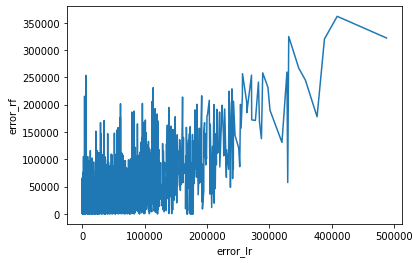

In [81]:
sns.lineplot(x='error_lr',y='error_rf',data=df)

In [82]:
corr_lr_rf = df['error_lr'].corr(df['error_rf'])

In [83]:
corr_lr_rf

0.6158430078939185

In [84]:
y_pred = (df['lr_predictions'] + df['rf_predictions'] + df['dt_predictions']) /3 

In [86]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error, mean_squared_error

mae = np.round(mean_absolute_error(y_test,y_pred),2)
mape = np.round(mean_absolute_percentage_error(y_test,y_pred),4)
rmse = np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2)


In [87]:
print("MAE :", mae)
print("MAPE :", mape)
print("RMSE :", rmse)

MAE : 36759.04
MAPE : 0.2099
RMSE : 53597.73


In [89]:
y_pred =  (df['rf_predictions'] + df['dt_predictions']) /2 

In [90]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error, mean_squared_error

mae = np.round(mean_absolute_error(y_test,y_pred),2)
mape = np.round(mean_absolute_percentage_error(y_test,y_pred),4)
rmse = np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2)


In [ ]:
print("MAE :", mae)
print("MAPE :", mape)
print("RMSE :", rmse)

MAE : 34713.48
MAPE : 0.1966
RMSE : 52321.87
